In [1]:
import matplotlib.pyplot as plotlib
import numpy as np
import seaborn as sns

In [4]:
def plot_heat_map(env, index):
    plotlib.pcolor(env)
    plotlib.gca().invert_yaxis()
    plotlib.title(f"Reward Function {index} Heat Map")
    plotlib.colorbar()
    plotlib.axis('equal')
    plotlib.show()

In [156]:
def rf1():
    rows, cols = 10, 10
    env = np.zeros((rows, cols))
    to_mark = [(2, 5), (2, 6), (3, 5), (3, 6), (4, 1), 
               (4, 2), (5, 1), (5, 2), (8, 2), (8, 3), 
               (9, 2), (9, 3)]
    
    for i in to_mark:
        env[i] = -10
    env[(9, 9)] = 1

    return env
    
def rf2():
    rows, cols = 10, 10
    env = np.zeros((rows, cols))
    to_mark = [(1, 4), (1, 5), (1, 6), (2, 4), (2, 6),
               (3, 4), (3, 6), (3, 7), (3, 8), (4, 4), 
               (4, 8), (5, 4), (5, 8), (6, 4), (6, 8),
               (7, 6), (7, 7), (7, 8), (8, 6)]
    
    for i in to_mark:
        env[i] = -100

    return env

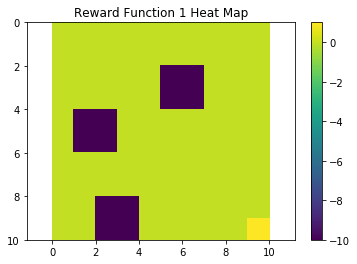

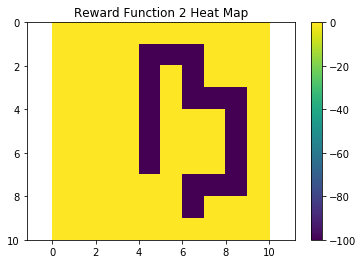

In [157]:
plot_heat_map(rf1(), 1)
plot_heat_map(rf2(), 2)

In [132]:
def get_actions(state):
    possible = []
    if (state[0] - 1) >= 0:
        possible.append('U')
    if (state[0] + 1) <= 9:
        possible.append('D')
    if (state[1] - 1) >= 0:
        possible.append('L')
    if (state[1] + 1) <= 9:
        possible.append('R')
        
    return possible
                    
def step(state, action):
    if action == 'U':
        return (state[0] - 1, state[1])
    if action == 'D':
        return (state[0] + 1, state[1])
    if action == 'L':
        return (state[0], state[1] - 1)
    if action == 'R':
        return (state[0], state[1] + 1)

def transition_probability(state, neighbor, neighbor_list, action, w):
    num_neighbors = len(neighbor_list)
    possible_actions = get_actions(state)
    next_state = step(state, action)
    
#     5 neighbors => inside graph
    if num_neighbors == 5:
        if state == neighbor:
            return 0
        elif next_state == neighbor:
            return 1 - w + w/4
        else:
            return w/4
        
#     4 neighbors => edge
    if num_neighbors == 4:
        if action not in possible_actions:
            if state == neighbor:
                return 1-w + w/4
            else:
                return w/4
        else:
            if next_state == neighbor:
                return 1 - w + w/4
            else:
                return w/4
            
#     3 neighbors => corner
    if num_neighbors == 3:
        if action not in possible_actions:
            if state == neighbor:
                return 1 - w + w/4 + w/4
            else:
                return w/4
        else:
            if state == neighbor:
                return w/4 + w/4
            elif next_state == neighbor:
                return 1 - w + w/4
            else:
                return w/4
    
    return 0

def neighbors(state):
    neighbor_list = [(state[0] - 1, state[1]),
                     (state[0] + 1, state[1]),
                     (state[0], state[1] - 1),
                     (state[0], state[1] + 1),
                     (state[0], state[1])]

    return [neighbor for neighbor in neighbor_list if ((neighbor[0] >= 0) and (neighbor[1] >= 0) and (neighbor[0] <= 9) and (neighbor[1] <= 9))]
    
def action_scores(actions, state, rf, g, w, V):
    scores = dict()
    
    for action in actions:
        scores[action] = 0
        neighbor_list = neighbors(state)
        for neighbor in neighbor_list:
            prob = transition_probability(state, neighbor, neighbor_list, action, w)
#             print(neighbor, state, action, prob)
            reward = rf[neighbor]
            scores[action] += (reward + g * V[neighbor])* prob
    
    return scores
    
def optimal_state_value(state_space, actions, rf, w, g, eps):
    V = np.zeros(state_space.shape)
    
    delta = float('inf')
    
    while delta > eps:
        delta = 0
        
        for state, _ in np.ndenumerate(state_space):
            v = V[state]
            V[state] = max(action_scores(actions, state, rf, g, w, V).values())
            delta = max(delta, np.fabs(v - V[state]))
    
    return V
            

In [158]:
state_space = np.zeros((10, 10))
actions = [ 'L', 'R', 'U', 'D']
w = 0.1
g = 0.8
eps = 0.01

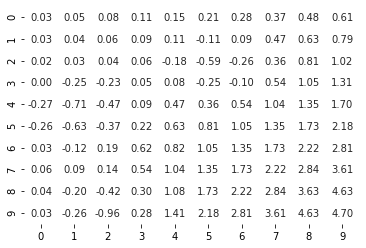

In [159]:
rf = rf1()
rf1_optimal_state_values = optimal_state_value(state_space, actions, rf, w, g, eps)

sns.heatmap(state_space, annot=rf1_optimal_state_values, fmt='.2f', cbar = False, cmap=['w'])

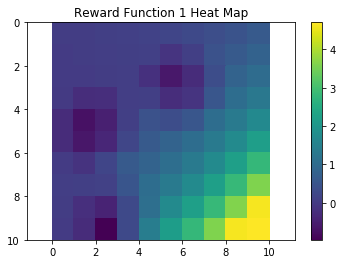

In [160]:
plot_heat_map(rf1_optimal_state_values, 1)

In [161]:
def optimal_policy(state_space, rf, g, w, V):
    arrows = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
    
    policy = np.zeros(state_space.shape, dtype = 'object')
    
    for state, _ in np.ndenumerate(state_space):
        scores = action_scores(actions, state, rf, g, w, V)
        maximum = max(scores, key = scores.get)
        policy[state] = arrows[maximum]
    
    return policy

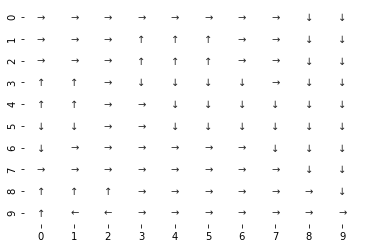

In [162]:
rf1_optimal_policy = optimal_policy(state_space, rf, g, w, rf1_optimal_state_values)

sns.heatmap(state_space, annot=rf1_optimal_policy, fmt='', cbar = False, cmap=['w'])